In [ ]:
#|default_exp models.positional_encoders

# Positional encoders

>This includes some variations of positional encoders used with Transformers.

## Imports

In [ ]:
#|export
from tsai.imports import *
from tsai.utils import *

## Positional encoders

In [ ]:
#|export
def PositionalEncoding(q_len, d_model, normalize=True):
    pe = torch.zeros(q_len, d_model)
    position = torch.arange(0, q_len).unsqueeze(1)
    div_term = torch.exp(torch.arange(0, d_model, 2) * -(math.log(10000.0) / d_model))
    pe[:, 0::2] = torch.sin(position * div_term)
    pe[:, 1::2] = torch.cos(position * div_term)
    if normalize:
        pe = pe - pe.mean()
        pe = pe / (pe.std() * 10) 
    return pe

SinCosPosEncoding = PositionalEncoding

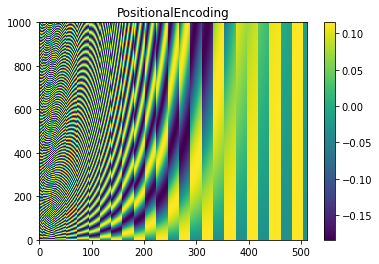

(5.438924e-10, 0.09999991, -0.18388666, 0.11518021, (1000, 512))

In [ ]:
pe = PositionalEncoding(1000, 512).detach().cpu().numpy()
plt.pcolormesh(pe, cmap='viridis')
plt.title('PositionalEncoding')
plt.colorbar()
plt.show()
pe.mean(), pe.std(), pe.min(), pe.max(), pe.shape

In [ ]:
#|export
def Coord2dPosEncoding(q_len, d_model, exponential=False, normalize=True, eps=1e-3, verbose=False):
    x = .5 if exponential else 1
    i = 0
    for i in range(100):
        cpe = 2 * (torch.linspace(0, 1, q_len).reshape(-1, 1) ** x) * (torch.linspace(0, 1, d_model).reshape(1, -1) ** x) - 1
        pv(f'{i:4.0f}  {x:5.3f}  {cpe.mean():+6.3f}', verbose)
        if abs(cpe.mean()) <= eps: break
        elif cpe.mean() > eps: x += .001
        else: x -= .001
        i += 1
    if normalize:
        cpe = cpe - cpe.mean()
        cpe = cpe / (cpe.std() * 10) 
    return cpe

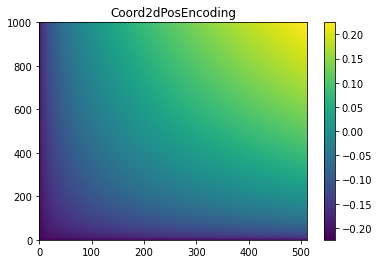

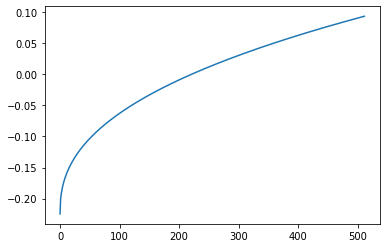

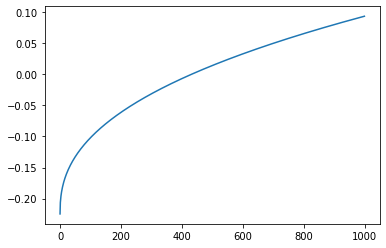

(3.695488e-09, 0.09999991, -0.22459325, 0.22487777)

In [ ]:
cpe = Coord2dPosEncoding(1000, 512, exponential=True, normalize=True).cpu().numpy()
plt.pcolormesh(cpe, cmap='viridis')
plt.title('Coord2dPosEncoding')
plt.colorbar()
plt.show()
plt.plot(cpe.mean(0))
plt.show()
plt.plot(cpe.mean(1))
plt.show()
cpe.mean(), cpe.std(), cpe.min(), cpe.max()

In [ ]:
#|export
def Coord1dPosEncoding(q_len, exponential=False, normalize=True):
    cpe = (2 * (torch.linspace(0, 1, q_len).reshape(-1, 1)**(.5 if exponential else 1)) - 1)
    if normalize:
        cpe = cpe - cpe.mean()
        cpe = cpe / (cpe.std() * 10) 
    return cpe

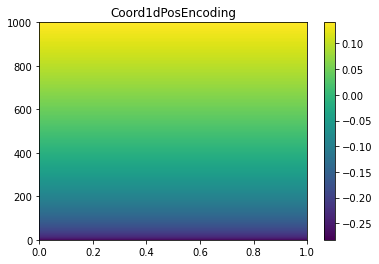

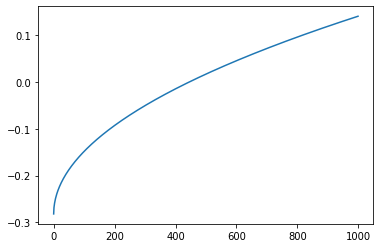

(0.0, 0.099949986, -0.2820423, 0.14113107, (1000, 1))

In [ ]:
cpe = Coord1dPosEncoding(1000, exponential=True, normalize=True).detach().cpu().numpy()
plt.pcolormesh(cpe, cmap='viridis')
plt.title('Coord1dPosEncoding')
plt.colorbar()
plt.show()
plt.plot(cpe.mean(1))
plt.show()
cpe.mean(), cpe.std(), cpe.min(), cpe.max(), cpe.shape

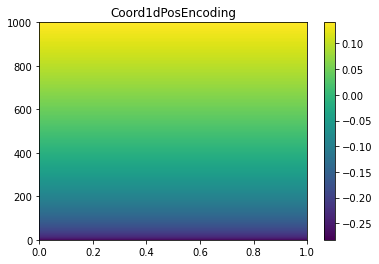

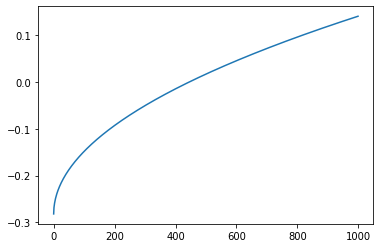

(0.0, 0.099949986, -0.2820423, 0.14113107)

In [ ]:
cpe = Coord1dPosEncoding(1000, exponential=True, normalize=True).detach().cpu().numpy()
plt.pcolormesh(cpe, cmap='viridis')
plt.title('Coord1dPosEncoding')
plt.colorbar()
plt.show()
plt.plot(cpe.mean(1))
plt.show()
cpe.mean(), cpe.std(), cpe.min(), cpe.max()

In [ ]:
#|eval: false
#|hide
from tsai.export import get_nb_name; nb_name = get_nb_name(locals())
from tsai.imports import create_scripts; create_scripts(nb_name)

<IPython.core.display.Javascript object>

/Users/nacho/notebooks/tsai/nbs/100c_models.positional_encoders.ipynb saved at 2022-11-09 12:58:26
Correct notebook to script conversion! 😃
Wednesday 09/11/22 12:58:28 CET
